In [3]:
hist = {}
for x in [1,2,3]:
    hist[x] = hist.get(x,0) + 1
    
hist

{1: 1, 2: 1, 3: 1}

In [4]:
t = [1,2,3]

In [6]:
from collections import Counter
counter = Counter(t)
counter

Counter({1: 1, 2: 1, 3: 1})

In [7]:
import thinkstats2

In [8]:
hist = thinkstats2.Hist([1,2,2,3,5])
hist

Hist({1: 1, 2: 2, 3: 1, 5: 1})

In [9]:
hist.Freq(2)

2

In [10]:
hist[2]

2

In [11]:
hist.Freq(100)

0

In [12]:
hist.Values()

dict_keys([1, 2, 3, 5])

In [13]:
for v in sorted(hist.Values()):
    print(v, hist.Freq(v))

1 1
2 2
3 1
5 1


In [14]:
for v, f in hist.Items():
    print(v,f)

1 1
2 2
3 1
5 1


/Users/t-arata/Documents/GHQWorkspace/github.com/ara-ta3/ThinkStats2/env/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


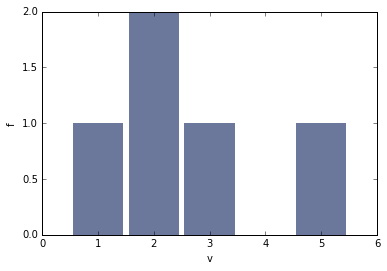

In [17]:
%matplotlib inline
import thinkplot
thinkplot.Hist(hist)
thinkplot.Show(xlabel='v',ylabel='f')

NameError: name 'nsfg' is not defined

In [3]:
"""This file contains code used in "Think Stats",
by Allen B. Downey, available from greenteapress.com

Copyright 2014 Allen B. Downey
License: GNU GPLv3 http://www.gnu.org/licenses/gpl.html
"""

from __future__ import print_function

import math
import numpy as np

import nsfg
import thinkstats2
import thinkplot


def MakeFrames():
    """Reads pregnancy data and partitions first babies and others.

    returns: DataFrames (all live births, first babies, others)
    """
    preg = nsfg.ReadFemPreg()

    live = preg[preg.outcome == 1]
    firsts = live[live.birthord == 1]
    others = live[live.birthord != 1]

    assert len(live) == 9148
    assert len(firsts) == 4413
    assert len(others) == 4735

    return live, firsts, others


def Summarize(live, firsts, others):
    """Print various summary statistics."""

    mean = live.prglngth.mean()
    var = live.prglngth.var()
    std = live.prglngth.std()

    print('Live mean', mean)
    print('Live variance', var)
    print('Live std', std)

    mean1 = firsts.prglngth.mean()
    mean2 = others.prglngth.mean()

    var1 = firsts.prglngth.var()
    var2 = others.prglngth.var()

    print('Mean')
    print('First babies', mean1)
    print('Others', mean2)

    print('Variance')
    print('First babies', var1)
    print('Others', var2)

    print('Difference in weeks', mean1 - mean2)
    print('Difference in hours', (mean1 - mean2) * 7 * 24)

    print('Difference relative to 39 weeks', (mean1 - mean2) / 39 * 100)

    d = thinkstats2.CohenEffectSize(firsts.prglngth, others.prglngth)
    print('Cohen d', d)


def PrintExtremes(live):
    """Plots the histogram of pregnancy lengths and prints the extremes.

    live: DataFrame of live births
    """
    hist = thinkstats2.Hist(live.prglngth)
    thinkplot.Hist(hist, label='live births')

    thinkplot.Save(root='first_nsfg_hist_live', 
                   title='Histogram',
                   xlabel='weeks',
                   ylabel='frequency')

    print('Shortest lengths:')
    for weeks, freq in hist.Smallest(10):
        print(weeks, freq)

    print('Longest lengths:')
    for weeks, freq in hist.Largest(10):
        print(weeks, freq)
    

def MakeHists(live):
    """Plot Hists for live births

    live: DataFrame
    others: DataFrame
    """
    hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
    thinkplot.Hist(hist)
    thinkplot.Save(root='first_wgt_lb_hist', 
                   xlabel='pounds',
                   ylabel='frequency',
                   axis=[-1, 14, 0, 3200])

    hist = thinkstats2.Hist(live.birthwgt_oz, label='birthwgt_oz')
    thinkplot.Hist(hist)
    thinkplot.Save(root='first_wgt_oz_hist', 
                   xlabel='ounces',
                   ylabel='frequency',
                   axis=[-1, 16, 0, 1200])

    hist = thinkstats2.Hist(np.floor(live.agepreg), label='agepreg')
    thinkplot.Hist(hist)
    thinkplot.Save(root='first_agepreg_hist', 
                   xlabel='years',
                   ylabel='frequency')

    hist = thinkstats2.Hist(live.prglngth, label='prglngth')
    thinkplot.Hist(hist)
    thinkplot.Save(root='first_prglngth_hist', 
                   xlabel='weeks',
                   ylabel='frequency',
                   axis=[-1, 53, 0, 5000])

def MakeComparison(firsts, others):
    """Plots histograms of pregnancy length for first babies and others.

    firsts: DataFrame
    others: DataFrame
    """
    first_hist = thinkstats2.Hist(firsts.prglngth, label='first')
    other_hist = thinkstats2.Hist(others.prglngth, label='other')

    width = 0.45
    thinkplot.PrePlot(2)
    thinkplot.Hist(first_hist, align='right', width=width)
    thinkplot.Hist(other_hist, align='left', width=width)

    thinkplot.Save(root='first_nsfg_hist', 
                   title='Histogram',
                   xlabel='weeks',
                   ylabel='frequency',
                   axis=[27, 46, 0, 2700])


def main(script):
    live, firsts, others = MakeFrames()

    MakeHists(live)
    PrintExtremes(live)
    MakeComparison(firsts, others)
    Summarize(live, firsts, others)


if __name__ == '__main__':
    import sys
    main(*sys.argv)




TypeError: main() takes 1 positional argument but 3 were given

In [5]:
import nsfg
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

/Users/a-tanaka/Documents/Private/Ghq/my.github.com/ara-ta3/ThinkStats2/code/nsfg.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.birthwgt_lb[df.birthwgt_lb > 20] = np.nan


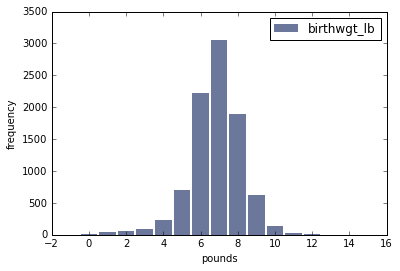

In [9]:
%matplotlib inline
import thinkstats2
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
thinkplot.Hist(hist)
thinkplot.Show(xlabel='pounds', ylabel='frequency')

In [10]:
hist

Hist({0.0: 8, 1.0: 40, 2.0: 53, 3.0: 98, 4.0: 229, 5.0: 697, 6.0: 2223, 7.0: 3049, 8.0: 1889, 9.0: 623, 10.0: 132, 11.0: 26, 12.0: 10, 13.0: 3, 14.0: 3, 15.0: 1})

In [11]:
live.birthwgt_lb

0         8
1         7
2         9
3         7
4         6
5         8
6         9
7         8
8         7
9         6
10        7
11        7
12        4
15        7
16        7
17        6
19        8
20        8
21        5
23        6
24        7
25        6
26        8
27        7
28        6
29        7
31        8
32        7
33        7
34        7
         ..
13548    10
13551     5
13552     7
13553     7
13554     6
13555     6
13556     7
13557     6
13559     7
13560     7
13561     6
13562     8
13563     7
13564     7
13565     8
13566     7
13569     5
13570     6
13571     6
13572     5
13573     6
13574     6
13576     6
13578     6
13579     7
13581     6
13584     6
13588     6
13591     7
13592     7
Name: birthwgt_lb, dtype: float64

In [12]:
for weeks, freq in hist.Smallest(10):
    print(weeks, freq)

0.0 8
1.0 40
2.0 53
3.0 98
4.0 229
5.0 697
6.0 2223
7.0 3049
8.0 1889
9.0 623


/Users/a-tanaka/Documents/Private/Ghq/my.github.com/ara-ta3/ThinkStats2/env/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


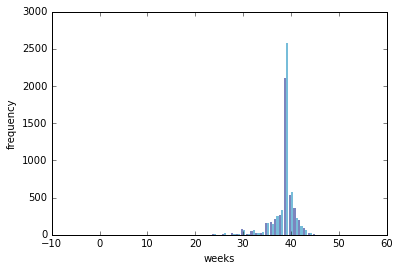

In [13]:
firsts = live[live.birthord == 1]
others = live[live.birthord != 1]
first_hist = thinkstats2.Hist(firsts.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width) 
thinkplot.Hist(other_hist, align='left', width=width) 
thinkplot.Show(xlabel='weeks', ylabel='frequency')


/Users/a-tanaka/Documents/Private/Ghq/my.github.com/ara-ta3/ThinkStats2/env/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


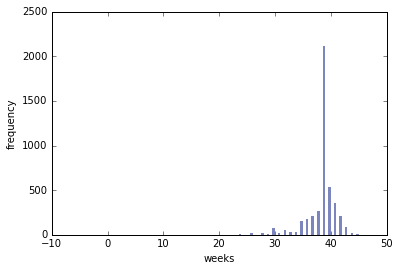

In [14]:
firsts = live[live.birthord == 1]
first_hist = thinkstats2.Hist(firsts.prglngth)
width = 0.45
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width) 
thinkplot.Show(xlabel='weeks', ylabel='frequency')

In [15]:
firstfirstss

,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
5,6,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,4870.926435,5325.196999,8874.440799,1,23,NaN,8.5625
8,7,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3409.579565,3787.539000,6911.879921,2,14,NaN,7.5625
10,12,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,3612.781968,4146.013572,6909.331618,1,31,NaN,7.8125
11,14,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,2418.069494,2810.302771,3039.904507,2,56,NaN,7.0000
15,15,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,1667.816099,3200.862017,5553.495599,1,33,NaN,7.6875
17,18,1,NaN,NaN,NaN,NaN,5,NaN,1,NaN,...,0,0,0,2957.257457,3404.403067,4153.371741,2,14,NaN,6.3125
19,21,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3408.342437,3965.763949,7237.122630,1,48,NaN,8.7500
21,23,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,6210.373020,8120.841310,13533.382043,2,64,NaN,5.5625


In [17]:
for i in firsts.columns:
    print (i)

caseid
pregordr
howpreg_n
howpreg_p
moscurrp
nowprgdk
pregend1
pregend2
nbrnaliv
multbrth
cmotpreg
prgoutcome
cmprgend
flgdkmo1
cmprgbeg
ageatend
hpageend
gestasun_m
gestasun_w
wksgest
mosgest
dk1gest
dk2gest
dk3gest
bpa_bdscheck1
bpa_bdscheck2
bpa_bdscheck3
babysex
birthwgt_lb
birthwgt_oz
lobthwgt
babysex2
birthwgt_lb2
birthwgt_oz2
lobthwgt2
babysex3
birthwgt_lb3
birthwgt_oz3
lobthwgt3
cmbabdob
kidage
hpagelb
birthplc
paybirth1
paybirth2
paybirth3
knewpreg
trimestr
ltrimest
priorsmk
postsmks
npostsmk
getprena
bgnprena
pnctrim
lpnctri
workpreg
workborn
didwork
matweeks
weeksdk
matleave
matchfound
livehere
alivenow
cmkidied
cmkidlft
lastage
wherenow
legagree
parenend
anynurse
fedsolid
frsteatd_n
frsteatd_p
frsteatd
quitnurs
ageqtnur_n
ageqtnur_p
ageqtnur
matchfound2
livehere2
alivenow2
cmkidied2
cmkidlft2
lastage2
wherenow2
legagree2
parenend2
anynurse2
fedsolid2
frsteatd_n2
frsteatd_p2
frsteatd2
quitnurs2
ageqtnur_n2
ageqtnur_p2
ageqtnur2
matchfound3
livehere3
alivenow3
cmkidied3
cmkid